In [3]:
#### Download dataset
!wget -O SOM.zip "https://sds-platform-private.s3-us-east-2.amazonaws.com/uploads/P16-Self-Organizing-Maps.zip"
!unzip SOM.zip

--2021-08-24 21:22:35--  https://sds-platform-private.s3-us-east-2.amazonaws.com/uploads/P16-Self-Organizing-Maps.zip
Resolvendo sds-platform-private.s3-us-east-2.amazonaws.com (sds-platform-private.s3-us-east-2.amazonaws.com)... 52.219.99.34
Conectando-se a sds-platform-private.s3-us-east-2.amazonaws.com (sds-platform-private.s3-us-east-2.amazonaws.com)|52.219.99.34|:443... conectado.
A requisição HTTP foi enviada, aguardando resposta... 200 OK
Tamanho: 18292 (18K) [application/zip]
Salvando em: “SOM.zip”

SOM.zip             100%[===================>]  17,86K  70,4KB/s    em 0,3s    

2021-08-24 21:22:37 (70,4 KB/s) - “SOM.zip” salvo [18292/18292]

Archive:  SOM.zip
   creating: Self_Organizing_Maps/
  inflating: __MACOSX/._Self_Organizing_Maps  
  inflating: Self_Organizing_Maps/.DS_Store  
  inflating: __MACOSX/Self_Organizing_Maps/._.DS_Store  
  inflating: Self_Organizing_Maps/som.py  
  inflating: __MACOSX/Self_Organizing_Maps/._som.py  
  inflating: Self_Organizing_Maps/Credit_

In [23]:
DATASET_DIRECTORY = 'Self_Organizing_Maps/'

In [24]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
# Importing the dataset
# Dataset http://archive.ics.uci.edu/ml/datasets/statlog+(australian+credit+approval)
dataset = pd.read_csv(DATASET_DIRECTORY + 'Credit_Card_Applications.csv')
dataset

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,15808223,1,31.57,10.500,2,14,4,6.500,1,0,0,0,2,0,1,1
686,15769980,1,20.67,0.415,2,8,4,0.125,0,0,0,0,2,0,45,0
687,15675450,0,18.83,9.540,2,6,4,0.085,1,0,0,0,2,100,1,1
688,15776494,0,27.42,14.500,2,14,8,3.085,1,1,1,0,2,120,12,1


In [26]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
print(f"X Dimension = {X.shape}")
print(f"y Dimension = {y.shape}")

X Dimension = (690, 15)
y Dimension = (690,)


In [27]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
X = sc.fit_transform(X)

In [28]:
# Training the SOM
from minisom import MiniSom
som = MiniSom(x=10, y=10, input_len=15, sigma=1.0, learning_rate=0.5)

In [29]:
# Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show

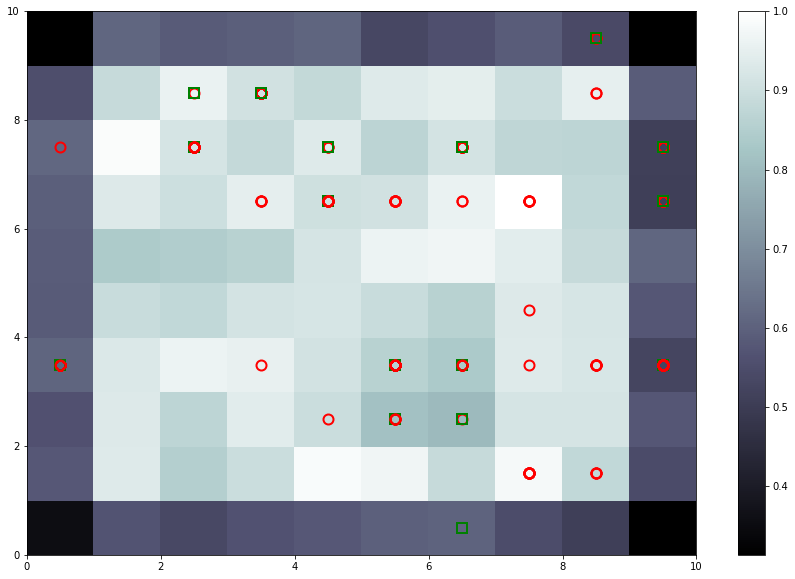

In [30]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor=colors[y[i]],
         markerfacecolor='None',
         markersize=10,
         markeredgewidth=2)
show()

In [31]:
# Finding the frauds
mappings = som.win_map(X)

In [32]:
frauds = np.concatenate((mappings[(3, 3)], mappings[(8, 8)]), axis=0)
pd.DataFrame(frauds)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.160806,0.0,0.087669,0.023750,0.0,0.538462,0.375,0.035088,0.0,1.0,0.014925,0.0,0.5,1.000,0.00002
1,0.112602,0.0,0.038797,0.007500,0.5,0.384615,0.375,0.004386,0.0,0.0,0.000000,0.0,0.5,0.100,0.00001
2,0.177284,0.0,0.134135,0.028214,0.5,0.153846,0.375,0.002982,0.0,0.0,0.000000,0.0,0.5,0.072,0.00000
